# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [60]:
import pandas as pd 
import numpy as np
import pylab as plt
import seaborn as sns 
from statsmodels.formula.api import ols
import statsmodels.api as sm


## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

In [3]:
data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

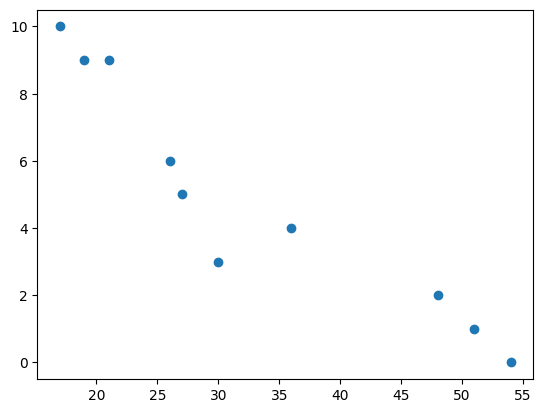

In [58]:
# Your code here.
plt.scatter(data["Age"], data["Tardies"])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Pos si parece que hay una relación inversamente proporcional muy fuerte entre la edad y llegar tarde


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
corr = data.corr()
corr #me dice que hay una correlación perfecta entre cada variable y sí misma(duh) y hay una correlación negativa 
     #muy fuerte entre las distintas variables, lo que decíamos más arriba        

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [6]:
cov= data.cov()
cov #igualmente vemos en la diagonal que según aumenta la edad se reduce el numero de veces que se llega tarde

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [93]:
X = data.drop(["Tardies"], axis=1) 
y = data["Tardies"]

In [94]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

X = data[['Age']]  
y = data['Tardies']

X_train, X_test, y_train, y_test  = tts(X, 
                                        y, 
                                        train_size=0.8, 
                                        test_size=0.2,
                                        random_state=42)

regression_model.fit(X, y)

y_pred = regression_model.predict(X)

y_pred

array([ 8.76085026,  0.50494405,  6.33264255,  7.78956717,  4.14725561,
        1.23340636,  8.27520872,  6.57546332, -0.22351827,  5.60418024])

Plot your regression model on your scatter plot.

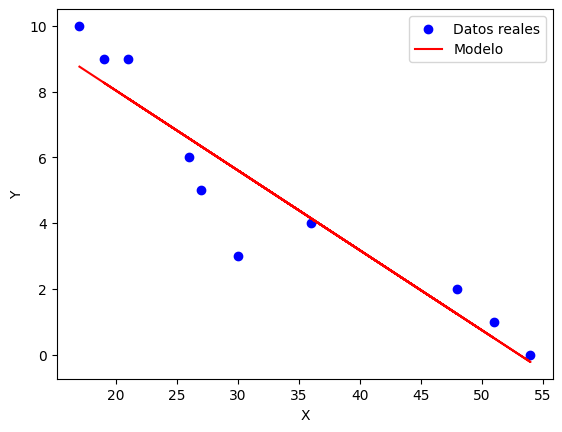

In [100]:

y_pred = regression_model.predict(X)

plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Modelo')
plt.xlabel('X')
plt.ylabel('Y') 
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Depende un poco la verdad, ahí hay demasiados factores como para sacar unas conclusiones de tan pocos casos

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [114]:
# Import any libraries you may need & the data

cars= pd.read_csv(r"C:\Users\Juan\Desktop\IronHack_apuntes\7.3-lab_regression_analysis\vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [115]:
# Your response here. 
cars.head()
cars2 = cars[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]]

In [116]:
corr2= cars2.corr()
corr2 #pues parece que el coste del combustible, los barriles anuales 

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [117]:
# Your response here. 
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

X = cars2.drop(cars2[["Fuel Barrels/Year","CO2 Emission Grams/Mile"]], axis=1)  
y = cars2["CO2 Emission Grams/Mile"]

X_train, X_test, y_train, y_test  = tts(X, 
                                        y, 
                                        train_size=0.8, 
                                        test_size=0.2,
                                        random_state=42)



In [118]:
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

y_pred

array([346.14479136, 498.12284468, 471.61197389, ..., 510.22563421,
       479.53003655, 573.40653074])

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [119]:
# Your response here. 
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.9288747903376546

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 


In [120]:
# Your code here. 

data = pd.DataFrame({'Invitados': [1,3,4,6,8,9,11,14], 'Van': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

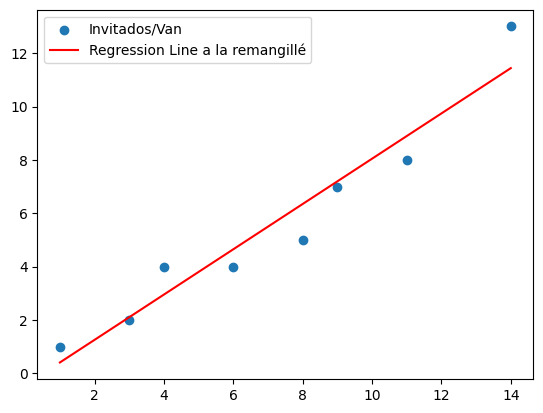

In [131]:
# Your code here.
plt.scatter(data["Invitados"], data["Van"], label = "Invitados/Van")
# Fit a regression line
coefficients = np.polyfit(data['Invitados'], data['Van'], 1)
poly_eq = np.poly1d(coefficients)
plt.plot(data['Invitados'], poly_eq(data['Invitados']), color='red', label='Regression Line a la remangillé');
plt.legend()

plt.show()

In [132]:
#ML
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

X = data[['Invitados']]  
y = data['Van']

X_train, X_test, y_train, y_test  = tts(X, 
                                        y, 
                                        train_size=0.8, 
                                        test_size=0.2,
                                        random_state=42)

regression_model.fit(X, y)

y_pred = regression_model.predict(X)

y_pred

array([ 0.40909091,  2.10606061,  2.95454545,  4.65151515,  6.34848485,
        7.1969697 ,  8.89393939, 11.43939394])

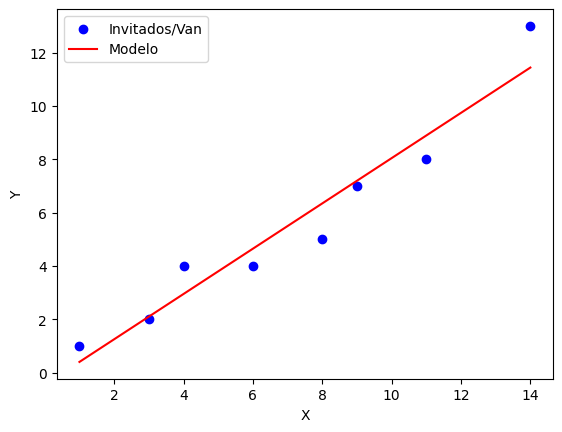

In [134]:

plt.scatter(X, y, color='blue', label='Invitados/Van')
plt.plot(X, y_pred, color='red', label='Modelo')
plt.xlabel('X')
plt.ylabel('Y') 
plt.legend()
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Pues que efectivamente hay una relación directamente proporcional entre la cantidad de gente invitada y los que no van

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [135]:
# Your response here. 
data = pd.DataFrame({'Invitados': [1,3,4,6,8,9,11], 'Van': [1,2,4,4,5,7,8]}) #se podría hacer mejor pero soy un cutre

In [136]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()

X = data[['Invitados']]  
y = data['Van']

X_train, X_test, y_train, y_test  = tts(X, 
                                        y, 
                                        train_size=0.8, 
                                        test_size=0.2,
                                        random_state=42)

regression_model.fit(X, y)

y_pred = regression_model.predict(X)

y_pred

array([1.0075188 , 2.37593985, 3.06015038, 4.42857143, 5.79699248,
       6.48120301, 7.84962406])

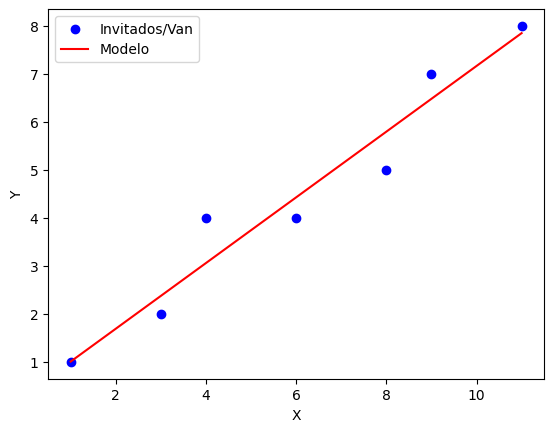

In [137]:

plt.scatter(X, y, color='blue', label='Invitados/Van')
plt.plot(X, y_pred, color='red', label='Modelo')
plt.xlabel('X')
plt.ylabel('Y') 
plt.legend()
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# El modelo es mucho mejor a la hora de predecir con el outlier quitado